In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import glob

In [278]:
path = "../data/enviData/ChapterM_Minerals/"
txt_files = glob.glob(path + "/**/*.txt", recursive = True)

newList = []
counter = 0

In [279]:
for index in range(len(txt_files)):
    if txt_files[index].find('_NIC') == -1:
        newList.append(txt_files[index])
    #envi = pd.read_fwf(txt_files[index], skiprows = 1, header = None)
    

In [280]:
for index in range(len(newList)):
    envi = pd.read_fwf(newList[index], skiprows = 1, header = None)
    if envi[0][0] < 0:
        envi[0][0] = envi[0][1]
    if envi[0][2150] < 0:
        envi[0][2150] = envi[0][2149]
    if (envi.values < 0).any():
        envi = envi.replace(-1.23e+34, np.nan)
        envi = envi.interpolate()
    if (envi.values == 0).any():
        counter = counter +1
    envi[1] = envi[0]
    envi[0] = datax[0]
    envi.columns = ['wave','reflectance']
    envi.to_csv(newList[index].replace('ChapterM_Minerals', 'cleanFolder'), index=None, sep=' ')

In [281]:
envi

,wave,reflectance
0,0.350,0.374813
1,0.351,0.374813
2,0.352,0.376043
3,0.353,0.378371
4,0.354,0.378754
...,...,...
2146,2.496,0.519968
2147,2.497,0.520822
2148,2.498,0.520634
2149,2.499,0.520458


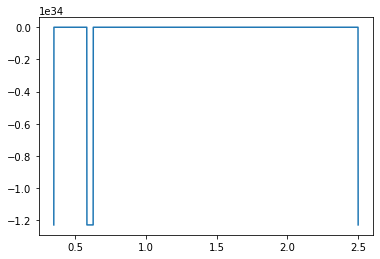

In [265]:
filedatax = '../data/enviData/s07_ASD_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt'
filedatay = '../data/enviData/ChapterM_Minerals/s07_ASD_Axinite_HS342.2B_ASDFRb_AREF.txt'

datax = pd.read_fwf(filedatax, skiprows = 1, header = None)
datay = pd.read_fwf(filedatay, skiprows = 1, header = None)
#datay = datay.replace(-1.23e+34, np.nan)
#datay = datay.interpolate()
plt.plot(datax, datay)


In [283]:
counter

0